In [ ]:
# Descarga de la librería para graficar treemap.
!pip install squarify

In [ ]:
# Descarga del pipeline
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 19.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Carga de librerías.
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import re
from IPython.display import display, HTML

In [ ]:
# Se carga el pipeline entrenado para el idionma español.
nlp = spacy.load("es_core_news_md")

In [ ]:
# Fragmento de biografía de David Alfaro Siqueiros.
siqueiros = """Nació el 29 de diciembre de 1896 en Santa Rosalía de Camargo, Chihuahua,
y murió el 4 de enero de 1974 en Cuernavaca, Morelos. Comenzó sus estudios
de Pintura en 1908 mientras acudía de manera intermitente a la Academia de
San Carlos, institución a la que se integró de manera regular en 1911.
En 1913 ingresó a la Escuela de Pintura al Aire Libre de Santa Anita y cinco
años después viajó a Europa donde conoció a Diego Rivera. En 1921, durante su
estancia en Barcelona, España, redactó y publicó uno de los textos fundacionales
para el arte mexicano de la primera mitad del siglo XX, y en 1922, de regreso
en México, se incorporó al grupo de artistas comisionados para llevar a cabo
el programa iconográfico mural de la Escuela Nacional Preparatoria."""

In [ ]:
texto = """Recién llegado por definición es: aquella diferente persona notada enseguida por todos,
           que llegado recién a un país de la clase de los diferentes, tiene el aire digno de un hombre
           que no sabe si se ha puesto los pantalones del revés, o el sombrero derecho en la cabeza izquierda,
           y no se decide a cerciorarse del desperfecto en público, sino que se concentra en una meditación
           sobre eclipses, ceguera de los transeúntes, huelga de los repartidores de luz, invisibilidad de los
           átomos y del dinero de papá, y así logra no ser visto."""

In [ ]:
# Se eliminan signos de puntuación, saltos de línea y tabuladores.
siqueiros = re.sub(r'[^\w]|[\n\t]',' ', siqueiros)
siqueiros

'Nació el 29 de diciembre de 1896 en Santa Rosalía de Camargo  Chihuahua  y murió el 4 de enero de 1974 en Cuernavaca  Morelos  Comenzó sus estudios de Pintura en 1908 mientras acudía de manera intermitente a la Academia de San Carlos  institución a la que se integró de manera regular en 1911  En 1913 ingresó a la Escuela de Pintura al Aire Libre de Santa Anita y cinco años después viajó a Europa donde conoció a Diego Rivera  En 1921  durante su estancia en Barcelona  España  redactó y publicó uno de los textos fundacionales para el arte mexicano de la primera mitad del siglo XX  y en 1922  de regreso en México  se incorporó al grupo de artistas comisionados para llevar a cabo el programa iconográfico mural de la Escuela Nacional Preparatoria '

In [ ]:
# Se carga el texto en
doc_spacy = nlp(siqueiros)
print(f'Número de tokens: {len(doc_spacy)}')

Número de tokens: 146


In [ ]:
# Se extraen características de cada token y formatean en un dataframe.
pos = []

for token in doc_spacy:
    pos.append({
        'Token': token.text,
        'Lemma': token.lemma_,
        'Etiqueta': token.tag_,
        'Descripción': spacy.explain(token.pos_),
    })

df_pos = pd.DataFrame(pos)
df_pos.drop(df_pos[(df_pos['Etiqueta'] == 'SPACE') | (df_pos['Etiqueta'] == 'ADP')].index, inplace = True)
df_pos.head(20)

,Token,Lemma,Etiqueta,Descripción
0,Nació,nacer,VERB,verb
1,el,el,DET,determiner
2,29,29,NUM,numeral
4,diciembre,diciembre,NOUN,noun
6,1896,1896,NUM,numeral
8,Santa,Santa,PROPN,proper noun
9,Rosalía,Rosalía,PROPN,proper noun
11,Camargo,Camargo,PROPN,proper noun
13,Chihuahua,Chihuahua,PROPN,proper noun
15,y,y,CCONJ,coordinating conjunction


In [ ]:
df_pos.head(60
            )

,Token,Lemma,Etiqueta,Descripción
0,Nació,nacer,VERB,verb
1,el,el,DET,determiner
2,29,29,NUM,numeral
4,diciembre,diciembre,NOUN,noun
6,1896,1896,NUM,numeral
8,Santa,Santa,PROPN,proper noun
9,Rosalía,Rosalía,PROPN,proper noun
11,Camargo,Camargo,PROPN,proper noun
13,Chihuahua,Chihuahua,PROPN,proper noun
15,y,y,CCONJ,coordinating conjunction


In [ ]:
df_pos

,Token,Lemma,Etiqueta,Descripción
0,Nació,nacer,VERB,verb
1,el,el,DET,determiner
2,29,29,NUM,numeral
3,de,de,ADP,adposition
4,diciembre,diciembre,NOUN,noun
...,...,...,...,...
141,de,de,ADP,adposition
142,la,el,DET,determiner
143,Escuela,Escuela,PROPN,proper noun
144,Nacional,Nacional,PROPN,proper noun


In [ ]:
df_pos['Descripción'].unique()

array(['verb', 'determiner', 'numeral', 'adposition', 'noun',
       'proper noun', 'space', 'coordinating conjunction',
       'subordinating conjunction', 'adjective', 'pronoun', 'adverb'],
      dtype=object)

In [ ]:
# Se crea un dataframe con el total de unidades sintácticas.
# Se eliminan las filas que no aportan información gramatical.
num_tokens = df_pos.groupby(['Etiqueta']).size().reset_index(name = 'Total').sort_values(by = 'Total', ascending = True)
num_tokens

,Etiqueta,Total
1,ADV,1
8,SCONJ,1
2,CCONJ,4
6,PRON,5
5,NUM,5
0,ADJ,9
9,VERB,12
3,DET,12
4,NOUN,23
7,PROPN,24


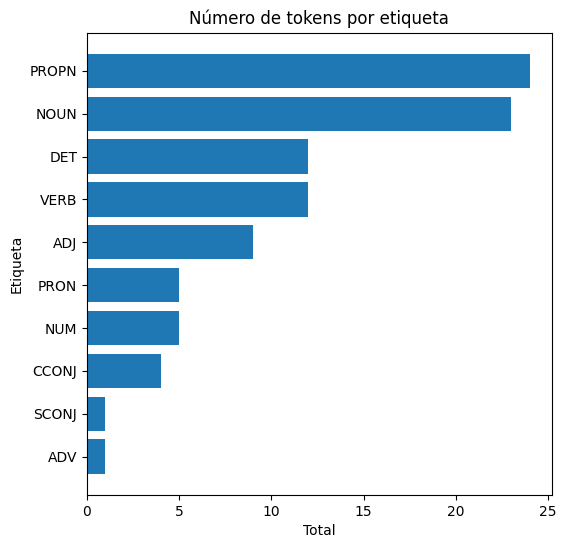

In [ ]:
# Gráfica de barras horizontales.
plt.figure(figsize = (6, 6))
plt.barh(num_tokens['Etiqueta'], num_tokens['Total'])
plt.xlabel('Total')
plt.ylabel('Etiqueta')
plt.title('Número de tokens por etiqueta')
plt.show()

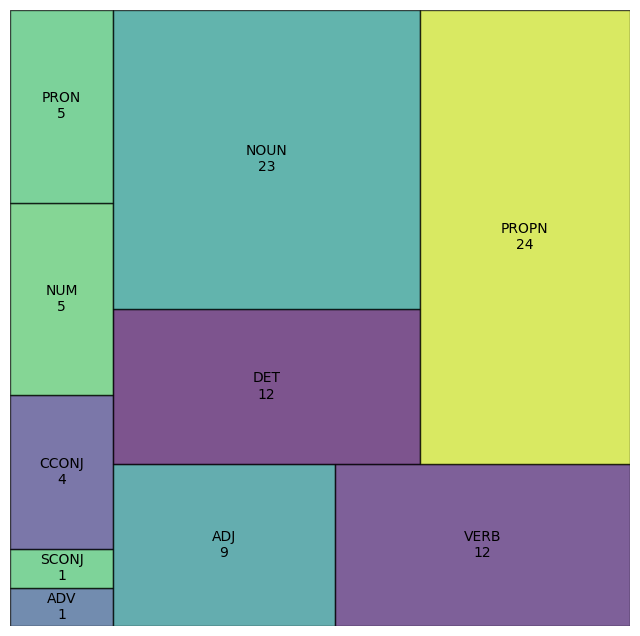

In [ ]:
#Gráfica de mapa de árbol o treemap.
labels_data =  [{row['Etiqueta']: row['Total']} for index, row in num_tokens.iterrows()]
plt.figure(figsize = (8, 8))
squarify.plot(sizes = num_tokens['Total'],
              label = [f"{list(label.keys())[0]}\n{list(label.values())[0]}" for label in labels_data],
              ec = 'black',
              alpha = 0.7)
plt.axis("off")
plt.show()

In [ ]:
doc_spacy_format = [(token.text, token.tag_) for token in doc_spacy]
doc_spacy_format

[('Nació', 'VERB'),
 ('el', 'DET'),
 ('29', 'NUM'),
 ('de', 'ADP'),
 ('diciembre', 'NOUN'),
 ('de', 'ADP'),
 ('1896', 'NUM'),
 ('en', 'ADP'),
 ('Santa', 'PROPN'),
 ('Rosalía', 'PROPN'),
 ('de', 'ADP'),
 ('Camargo', 'PROPN'),
 (' ', 'SPACE'),
 ('Chihuahua', 'PROPN'),
 (' ', 'SPACE'),
 ('y', 'CCONJ'),
 ('murió', 'VERB'),
 ('el', 'DET'),
 ('4', 'NUM'),
 ('de', 'ADP'),
 ('enero', 'NOUN'),
 ('de', 'ADP'),
 ('1974', 'NUM'),
 ('en', 'ADP'),
 ('Cuernavaca', 'PROPN'),
 (' ', 'SPACE'),
 ('Morelos', 'PROPN'),
 (' ', 'SPACE'),
 ('Comenzó', 'VERB'),
 ('sus', 'DET'),
 ('estudios', 'NOUN'),
 ('de', 'ADP'),
 ('Pintura', 'PROPN'),
 ('en', 'ADP'),
 ('1908', 'NOUN'),
 ('mientras', 'SCONJ'),
 ('acudía', 'VERB'),
 ('de', 'ADP'),
 ('manera', 'NOUN'),
 ('intermitente', 'ADJ'),
 ('a', 'ADP'),
 ('la', 'DET'),
 ('Academia', 'PROPN'),
 ('de', 'ADP'),
 ('San', 'PROPN'),
 ('Carlos', 'PROPN'),
 (' ', 'SPACE'),
 ('institución', 'NOUN'),
 ('a', 'ADP'),
 ('la', 'DET'),
 ('que', 'PRON'),
 ('se', 'PRON'),
 ('integró', '

In [ ]:
labels =  [{row['Etiqueta']: row['Total']} for index, row in num_tokens.iterrows()]
labels[1].keys()

dict_keys(['SCONJ'])

In [ ]:
# Identificación de entidades.
for ent in doc_spacy.ents:
    print(ent.text, ent.label_)

Santa Rosalía de Camargo  Chihuahua LOC
Cuernavaca  Morelos  Comenzó LOC
Pintura PER
Academia de San Carlos LOC
Escuela de Pintura al Aire Libre de Santa Anita ORG
Europa LOC
Diego Rivera PER
Barcelona LOC
España LOC
México LOC
Escuela Nacional Preparatoria ORG


In [ ]:
#
spacy.displacy.render(doc_spacy, style="ent")

In [ ]:
# Visualización del texto con entidades.
html = spacy.displacy.render(doc_spacy, style = 'ent', jupyter = False)
display(HTML(html))